In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
project_directory = '/content/drive/MyDrive/Python'

In [ ]:
!ls

drive  sample_data


In [ ]:
#importing pandas
import pandas as pd



# **Data Cleaning | Data Transformation**

In [33]:
def import_file_create_df(sheet_name):
  import pandas as pd
  df = pd.read_excel(project_directory+'/dataset.xlsx',sheet_name=sheet_name,header=8)
  df = df.iloc[:90, 0:16]
  df = df.dropna(axis=0,how='all')
  df = df.dropna(axis=1,how='all')
  # df = df.reset_index(inplace=True)
  df = df.set_index('Year')
  df.index = df.index.astype(int)
  df_dict = {sheet_name: df}
  return df_dict
  
bridge_name_short = ['AMB','DWT','OGB','PB','IBA','SIBC','TIBA','LQB','RBW','WPB'] 


bridge_data = [import_file_create_df(name) for name in bridge_name_short]

#bridge_data_dict = {name: import_file_create_df(name) for name in bridge_name_short}


In [ ]:
#Calling the PB dataframe to check if the data is imported successfuly  

bridge_data[3]['PB']


,Vehicle Classification,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
Year,,,,,,,,,,,,,,
2006,Passenger Cars,368663.0,344671.0,437544.0,433902.0,475776.0,504830.0,662850.0,652150.0,472062.0,413997.0,391854.0,385420.0,5543719.0
2006,Trucks,107437.0,103445.0,118803.0,104740.0,116765.0,114739.0,100335.0,116220.0,106703.0,106697.0,109395.0,96071.0,1301350.0
2006,Buses & Misc.,2282.0,2254.0,2516.0,2522.0,2688.0,2578.0,2680.0,2900.0,2620.0,2808.0,2994.0,2198.0,31040.0
2006,TOTAL,478382.0,450370.0,558863.0,541164.0,595229.0,622147.0,765865.0,771270.0,581385.0,523502.0,504243.0,483689.0,6876109.0
2007,Passenger Cars,331372.0,295402.0,395639.0,375143.0,430733.0,495246.0,611194.0,637918.0,469980.0,459825.0,422178.0,369142.0,5293772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,TOTAL,147323.0,147188.0,214697.0,261535.0,284167.0,307804.0,364697.0,376581.0,326329.0,342568.0,283481.0,255753.0,3312123.0
2023,Passenger Cars,199101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199101.0
2023,Trucks,86124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86124.0


In [34]:
bridge_name_short = ['AMB','DWT','OGB','PB','IBA','SIBC','TIBA','LQB','RBW','WPB'] 


In [35]:
#Imported each dataset into the specific variables to identify them with bridge name

for bridge in bridge_data:
  for key, value in bridge.items():
    if key == 'AMB':
      AMB = value
    elif key == 'DWT':
      DWT = value
    elif key == 'OGB':
      OGB = value
    elif key == 'PB':
      PB = value
    elif key == 'IBA':
      IBA = value
    elif key == 'PB':
      PB = value
    elif key == 'SIBC':
      SIBC = value
    elif key == 'TIBA':
      TIBA = value
    elif key == 'LQB':
      LQB = value
    elif key == 'RBW':
      RBW = value
    elif key == 'PB':
      PB = value
    elif key == 'WPB':
      WPB = value                                                
    else:
      print("Not Found")
     

# **Analyzing the Data for the Years 2012 and 2022**

In [30]:
Annual = pd.read_excel(project_directory+'/dataset.xlsx',sheet_name='Annual',header=62)

In [31]:
Annual = Annual.dropna(axis=0,how='all')
Annual = Annual.dropna(axis=1,how='all')
Annual = Annual.drop(13)
Annual = Annual.drop('2023 (YTD)', axis=1)
#Annual = Annual.transpose().loc['Total Crossings']
Annual

,Crossings,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Ambassador Bridge,9680232.0,9082435.0,7349305.0,6494620.0,7232366.0,7252916.0,7310302.0,7246608.0,7162182.0,6929199.0,6750091.0,6875030.0,7238514.0,6975467.0,4110302.0,4117384.0,4803288.0
2,Blue Water Bridge,5331751.0,5046700.0,4921954.0,4480873.0,4747027.0,5120079.0,5258364.0,5405208.0,5355664.0,4791968.0,4672578.0,4629527.0,4696264.0,4546442.0,2005542.0,2022035.0,3185083.0
3,Detroit-Windsor Tunnel,5457164.0,4898425.0,4762722.0,4002110.0,3611682.0,3789769.0,3974839.0,3980194.0,3907393.0,4181126.0,4390058.0,4267954.0,3871713.0,4219917.0,1373177.0,1067809.0,2970372.0
4,Ogdensburg Bridge,510804.0,552596.0,554239.0,555586.0,624378.0,711777.0,784464.0,836803.0,780603.0,632905.0,623971.0,679943.0,674548.0,666558.0,220557.0,183402.0,387773.0
5,Peace Bridge,6876109.0,6635881.0,6351818.0,5908235.0,6017725.0,6056998.0,6042618.0,5927886.0,5617983.0,5410247.0,5333910.0,5304528.0,5270645.0,5116168.0,1898457.0,1794056.0,3312123.0
6,Sault Ste. Marie Bridge Bridge Authority,1911339.0,1915825.0,1906735.0,1673785.0,1831319.0,1998068.0,2070449.0,2104458.0,1980841.0,1572035.0,1435761.0,1420808.0,1455020.0,1353149.0,340348.0,195657.0,624960.0
7,Seaway International Bridge,2543604.0,2585899.0,2567802.0,1805393.0,2268694.0,2376196.0,2278661.0,2230504.0,2320157.0,2267949.0,2280662.0,2380750.0,2377887.0,2418241.0,1755191.0,1815428.0,2135908.0
8,Thousand Islands Bridge,2053828.0,2121666.0,2062225.0,1989274.0,2077872.0,2065165.0,2110126.0,2119031.0,2079982.0,2014725.0,2003264.0,1996394.0,1969137.0,2045952.0,1065786.0,1080928.0,1592375.0
9,Lewiston-Queenston Bridge,4077306.0,3983656.0,3672532.0,3293139.0,3399849.0,3798104.0,3875897.0,3590528.0,3471393.0,3193853.0,3177480.0,3302192.0,3389717.0,3435285.0,1208809.0,1060011.0,2180661.0
10,Rainbow Bridge,3352034.0,3251311.0,3132162.0,2862367.0,3079653.0,3488987.0,3662774.0,3420004.0,3107168.0,2592605.0,2482615.0,2484643.0,2593388.0,2514512.0,413669.0,264522.0,1233697.0


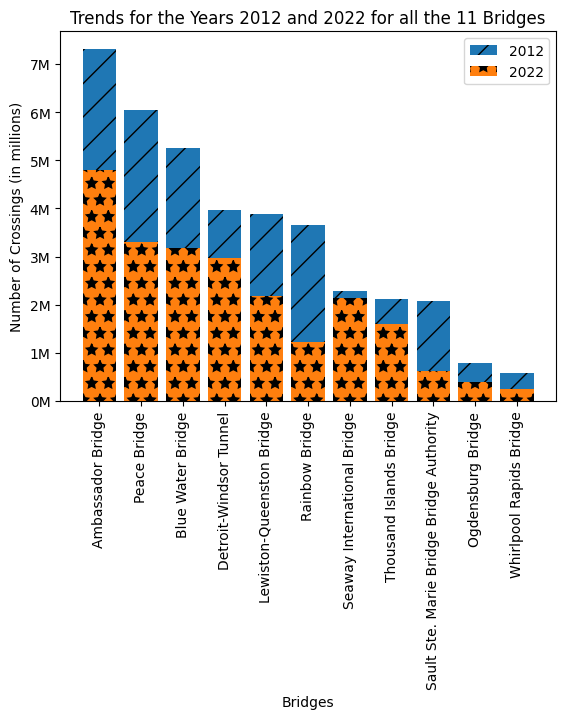

In [17]:
import matplotlib.pyplot as plt

# sort Annual by the total number of crossings in 2022
Annual_sorted = Annual.sort_values(2022, ascending=False)

fig, ax = plt.subplots()

# divide y-axis values by 1,000,000 to convert to millions
y_2012 = Annual_sorted[2012]/1000000
y_2022 = Annual_sorted[2022]/1000000

# create the first bar plot and set labels
ax.bar(Annual_sorted['Crossings'], y_2012, hatch='/', label='2012')
# create the second bar plot and set labels
ax.bar(Annual_sorted['Crossings'], y_2022, hatch='*', label='2022')

plt.xticks(rotation=90)

# format y-tick labels as millions
ax.set_yticklabels(['{:.0f}M'.format(y) for y in ax.get_yticks()])

# Set the label
ax.set_xlabel('Bridges')
ax.set_ylabel('Number of Crossings (in millions)')
ax.set_title('Trends for the Years 2012 and 2022 for all the 11 Bridges')

# add legend
ax.legend()
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.show()


# **Analyzed the Top 2 and Bottom 2 Bridges**

Top 2 Bridges

In [ ]:
filter = AMB['Vehicle Classification'] == 'TOTAL'
Top1 = AMB[filter].loc[2006:2022]
Top1

In [ ]:
filter = PB['Vehicle Classification'] == 'TOTAL'
Top2 = PB[filter].loc[2006:2022]
Top2

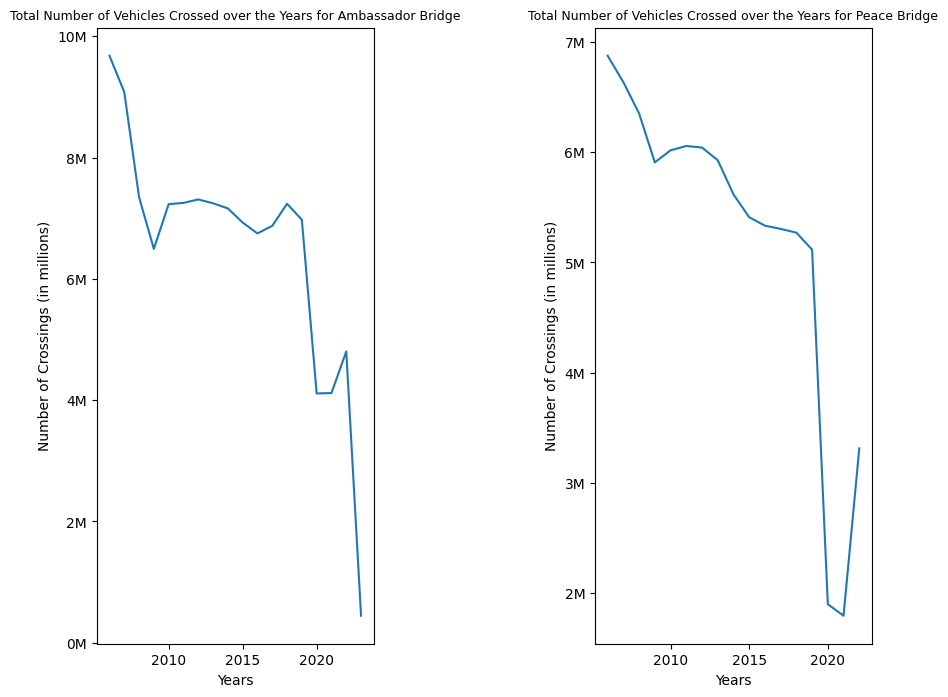

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# create the first line plot
sns.lineplot(data=Top1, x='Year', y='TOTAL', ax=ax1)

# format the y-axis tick labels as millions
formatter1 = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x/1000000))
ax1.yaxis.set_major_formatter(formatter1)

# set the y-axis label
ax1.set_ylabel('Number of Crossings (in millions)')
ax1.set_title('Total Number of Vehicles Crossed over the Years for Ambassador Bridge',fontsize = 9)

# create the second line plot
sns.lineplot(data=Top2, x='Year', y='TOTAL', ax=ax2)

# format the y-axis tick labels as millions
formatter2 = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x/1000000))
ax2.yaxis.set_major_formatter(formatter2)

# set the y-axis label
ax2.set_ylabel('Number of Crossings (in millions)')
ax2.set_title('Total Number of Vehicles Crossed over the Years for Peace Bridge',fontsize = 9)

# set the x-axis label for both subplots
for ax in (ax1, ax2):
    ax.set_xlabel('Years')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.8)

# display the plot
plt.show()


Bottom 2 Bridges

In [ ]:
filter = OGB['Vehicle Classification'] == 'TOTAL'
Bottom2 = OGB[filter].loc[2006:2022]
Bottom2


In [ ]:
filter = WPB['Vehicle Classification'] == 'TOTAL'
Bottom1 = WPB[filter].loc[2006:2022]
Bottom1

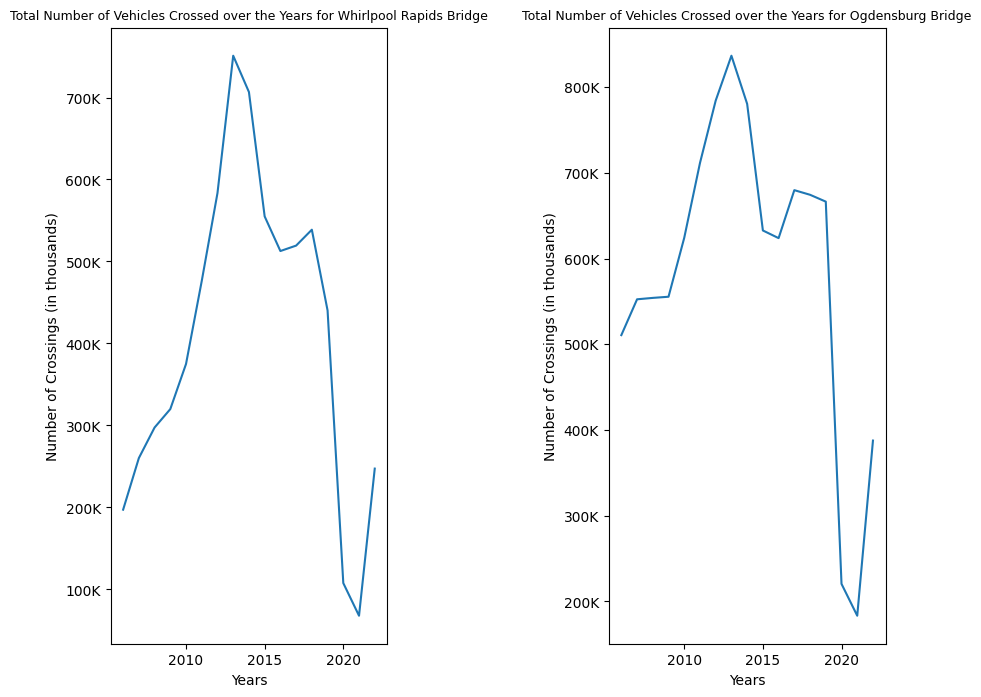

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# create the first line plot
sns.lineplot(data=Bottom1, x='Year', y='TOTAL', ax=ax1)

# format the y-axis tick labels as millions
formatter1 = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x/1000))
ax1.yaxis.set_major_formatter(formatter1)

# set the y-axis label
ax1.set_ylabel('Number of Crossings (in thousands)')
ax1.set_title('Total Number of Vehicles Crossed over the Years for Whirlpool Rapids Bridge',fontsize = 9)

# create the second line plot
sns.lineplot(data=Bottom2, x='Year', y='TOTAL', ax=ax2)

# format the y-axis tick labels as millions
formatter2 = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x/1000))
ax2.yaxis.set_major_formatter(formatter2)

# set the y-axis label
ax2.set_ylabel('Number of Crossings (in thousands)')
ax2.set_title('Total Number of Vehicles Crossed over the Years for Ogdensburg Bridge',fontsize = 9)

# set the x-axis label for both subplots
for ax in (ax1, ax2):
    ax.set_xlabel('Years')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.8)

# display the plot
plt.show()


The graph has two subplots, each showing a line plot of the total number of vehicles crossed over the years for bottom two different bridges.

Both the subplot shows the data for Whirlpool Rapids Bridge and  Peace Bridge, X-axis represents the years where as the Y-axis represents the number of crossings in thousands . The line plot shows a fluctuating trend over time, with some years showing an increase in crossings and others showing a decrease. There is no clear pattern of increase or decrease over time for the Peace Bridge.

# **Analysing the trend for different Category of Vehicles for last 5 Years**

For Passenger Cars

In [ ]:
Annual_PassengersCars = pd.read_excel(project_directory+'/dataset.xlsx',sheet_name='Annual',header=8)


In [ ]:
Annual_PassengersCars = Annual_PassengersCars.dropna(axis=0,how='all')
Annual_PassengersCars = Annual_PassengersCars.dropna(axis=1,how='all')
Annual_PassengersCars

In [ ]:
Annual_PassengersCars = Annual_PassengersCars.iloc[:11, 0:24]
Annual_PassengersCars

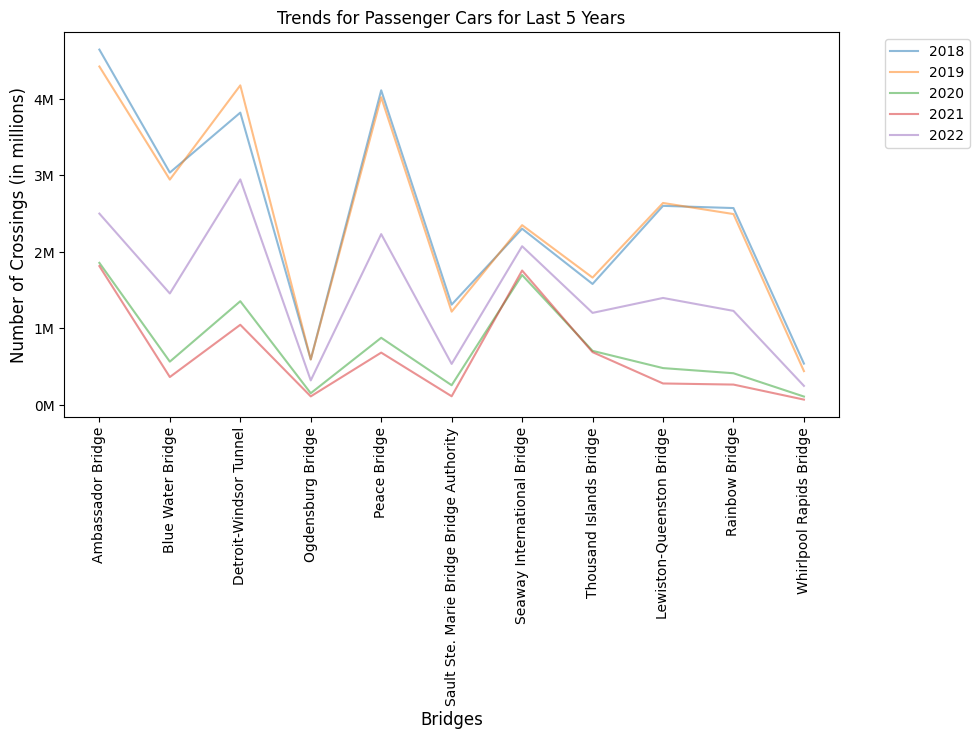

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 1,000,000 to convert to millions
    y_vals = Annual_PassengersCars[year]/1000000
    
    # create a line plot for the current year
    ax.plot(Annual_PassengersCars['Crossings'], y_vals, label=str(year), alpha=0.5)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as millions
ax.set_yticklabels(['{:.0f}M'.format(y) for y in ax.get_yticks()])

# set the label
ax.set_xlabel('Bridges',fontsize = 12)
ax.set_ylabel('Number of Crossings (in millions)',fontsize =12)
ax.set_title('Trends for Passenger Cars for Last 5 Years',fontsize = 12)

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()


For Truck's

In [55]:
Annual_Trucks = pd.read_excel(project_directory+'/dataset.xlsx',sheet_name='Annual',header=26)


In [ ]:
Annual_Trucks = Annual_Trucks.dropna(axis=0,how='all')
Annual_Trucks = Annual_Trucks.dropna(axis=1,how='all')
Annual_Trucks

In [ ]:
Annual_Trucks = Annual_Trucks.iloc[:11, 0:24]
Annual_Trucks

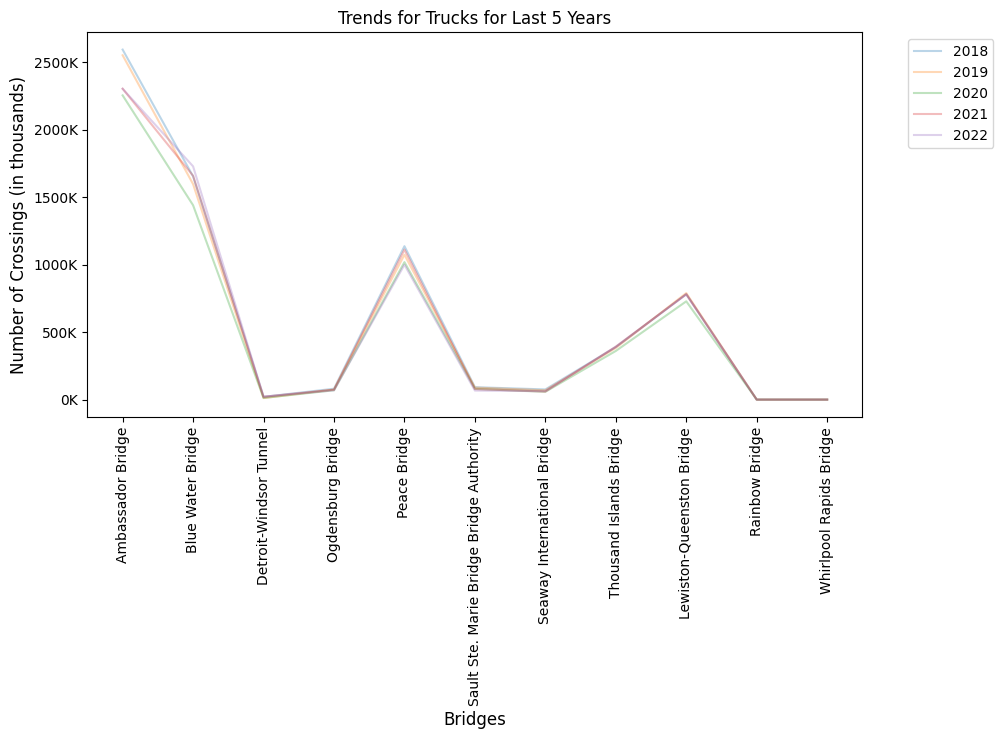

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 1,000 to convert to thousands (K)
    y_vals = Annual_Trucks[year]/1000
    
    # create a line plot for the current year
    ax.plot(Annual_Trucks['Crossings'], y_vals, label=str(year), alpha=0.3)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as thousands (K)
ax.set_yticklabels(['{:.0f}K'.format(y) for y in ax.get_yticks()])

# set the label
ax.set_xlabel('Bridges',fontsize = 12)
ax.set_ylabel('Number of Crossings (in thousands)',fontsize =12)
ax.set_title('Trends for Trucks for Last 5 Years',fontsize = 12)

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.show()


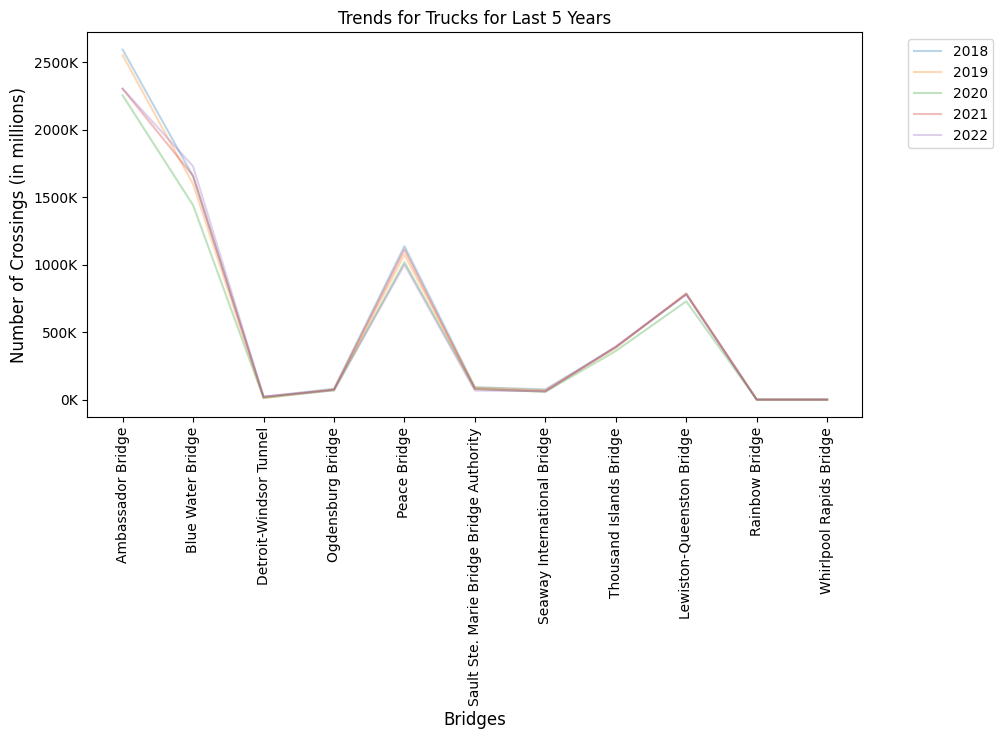

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 1,000 to convert to thousands (K)
    y_vals = Annual_Trucks[year]/1000
    
    # create a line plot for the current year
    ax.plot(Annual_Trucks['Crossings'], y_vals, label=str(year), alpha=0.3)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as thousands (K)
ax.set_yticklabels(['{:.0f}K'.format(y) for y in ax.get_yticks()])

# set the label
ax.set_xlabel('Bridges',fontsize = 12)
ax.set_ylabel('Number of Crossings (in millions)',fontsize =12)
ax.set_title('Trends for Trucks for Last 5 Years',fontsize = 12)

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.show()


For Buses and Misc Vehicles

In [ ]:
Annual_BusesMisc = pd.read_excel(project_directory+'/dataset.xlsx',sheet_name='Annual',header=44)

In [ ]:
Annual_BusesMisc = Annual_BusesMisc.dropna(axis=0,how='all')
Annual_BusesMisc = Annual_BusesMisc.dropna(axis=1,how='all')
Annual_BusesMisc

In [ ]:
Annual_BusesMisc = Annual_BusesMisc.iloc[:11, 0:24]
Annual_BusesMisc

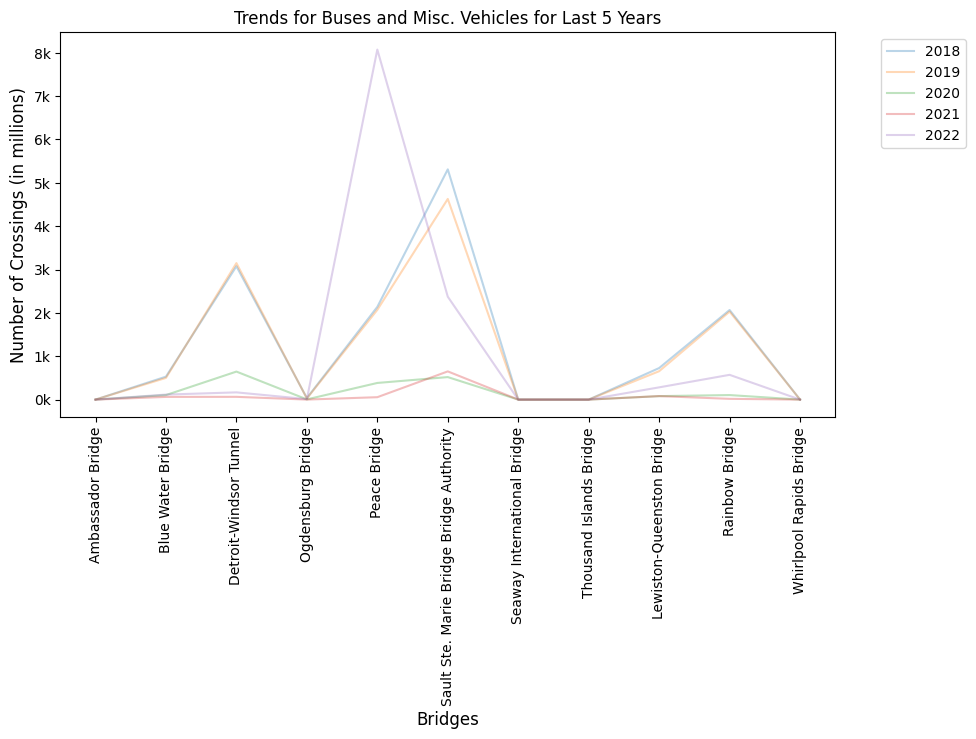

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 10,000 to convert to millions
    y_vals = Annual_BusesMisc[year]/10000
    
    # create a line plot for the current year
    ax.plot(Annual_Trucks['Crossings'], y_vals, label=str(year), alpha=0.3)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as millions
ax.set_yticklabels(['{:.0f}k'.format(k) for k in ax.get_yticks()])

# set the label
ax.set_xlabel('Bridges',fontsize = 12)
ax.set_ylabel('Number of Crossings (in millions)',fontsize =12)
ax.set_title('Trends for Buses and Misc. Vehicles for Last 5 Years',fontsize = 12)

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()
